# 효율적 투자 전략
* 대상 종목 : 주식, 채권

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



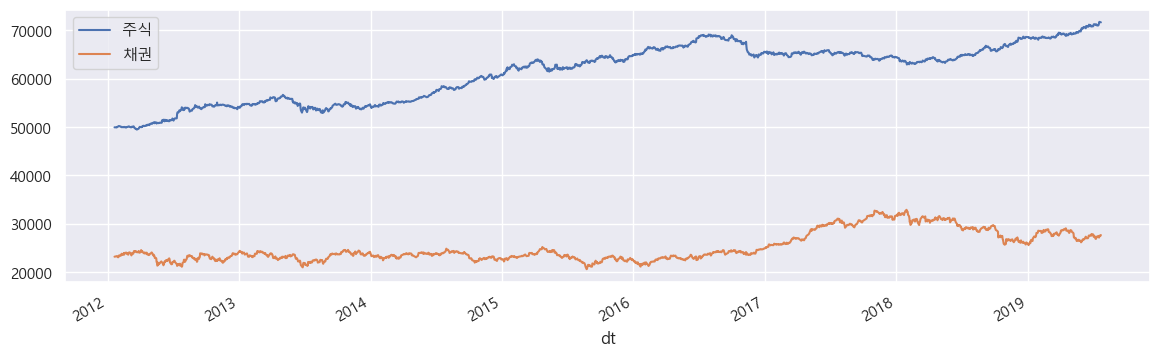

In [2]:
sdf = pd.read_csv('../datasets/kodex_stock.csv', parse_dates=['dt'], index_col=0)[['close']]
bdf = pd.read_csv('../datasets/kodex_bond10y.csv', parse_dates=['dt'], index_col=0)[['close']]
df = pd.concat([sdf, bdf], axis=1)
df.columns = ['주식', '채권']
df.plot(figsize=(14,4))
plt.show()

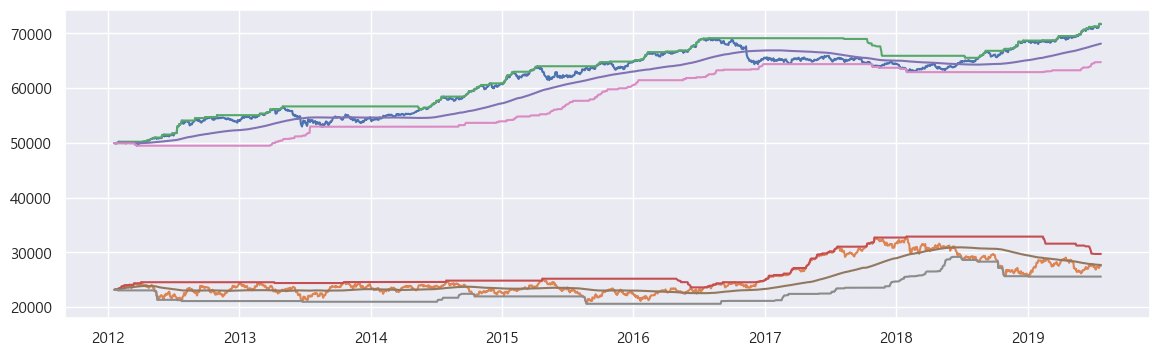

In [3]:
plt.figure(figsize=(14,4))
plt.plot(df)
plt.plot(df.rolling(window=252, min_periods=1).max())
plt.plot(df.rolling(window=252, min_periods=1).mean())
plt.plot(df.rolling(window=252, min_periods=1).min())
plt.show()

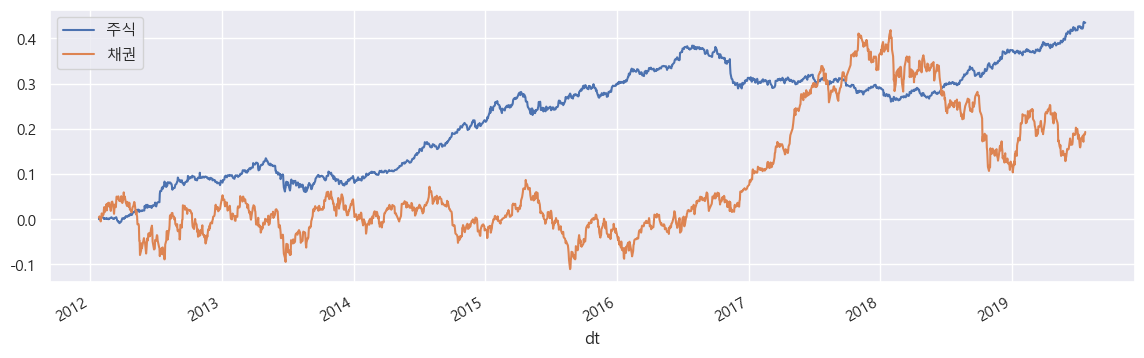

In [4]:
((1 + df.pct_change()).cumprod() - 1).plot(figsize=(14,4))
plt.show()

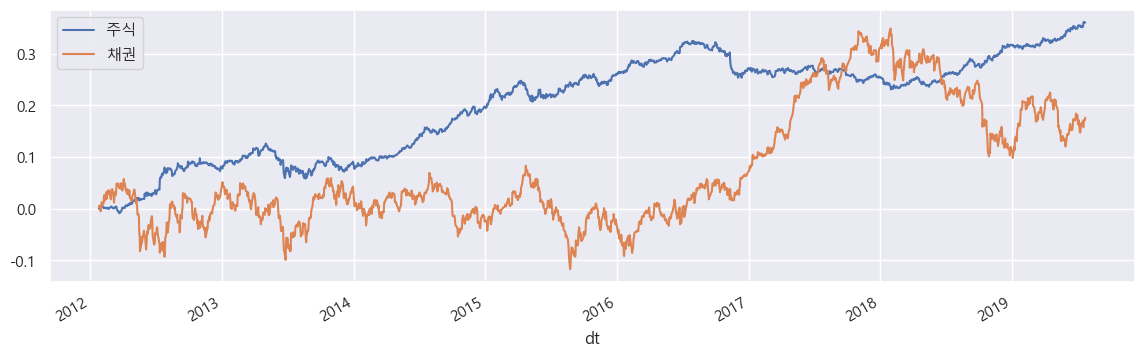

In [5]:
ret_df = np.log(1 + df.pct_change()).dropna()
ret_df.cumsum().plot(figsize=(14,4))
plt.show()

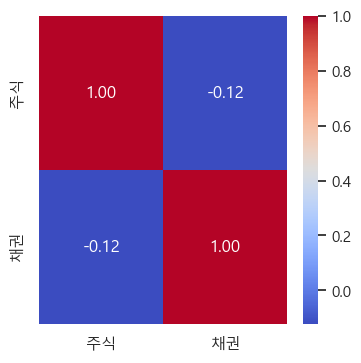

In [6]:
plt.figure(figsize=(4,4))
sns.heatmap(ret_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

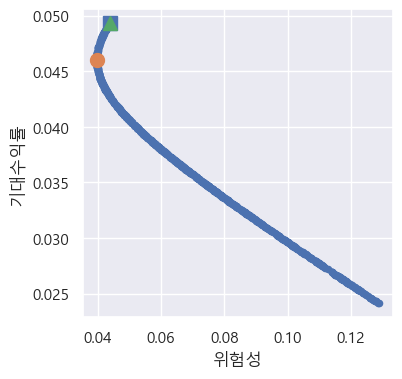

추천가중치 top3
           주식        채권
248  0.999796  0.000204
112  0.997167  0.002833
410  0.997065  0.002935


In [117]:
def 포트폴리오(ret_df):
    년간기대수익률 = ret_df.mean() * 252
    년간위험성 = ret_df.cov() * 252

    가중치_list = []
    기대수익률_list = []
    위험성_list = []
    샤프지수_list = []

    for _ in range(1000):
        가중치 = np.random.random(ret_df.shape[1])
        가중치 = 가중치 / 가중치.sum()
        가중치_list.append(가중치)

        기대수익률_list.append( np.dot( 가중치, 년간기대수익률 ) )
        위험성_list.append( np.sqrt( np.dot( np.dot( 가중치, 년간위험성 ), 가중치.T ) ) )
        샤프지수_list.append( (np.dot( 가중치, 년간기대수익률 )-0.0345)/np.sqrt( np.dot( np.dot( 가중치, 년간위험성 ), 가중치.T ) ) ) #0.0345 CD금리


    가중치_df = pd.DataFrame(가중치_list, columns=ret_df.columns)
    기대수익률위험성_df = pd.DataFrame({'기대수익률':기대수익률_list, '위험성':위험성_list, '샤프지수':샤프지수_list})

    최대기대수익률_기대수익률, 최대기대수익률_위험성 = 기대수익률위험성_df.sort_values('기대수익률', ascending=False).iloc[0,0:2].values
    최소위험성_기대수익률,     최소위험성_위험성    = 기대수익률위험성_df.sort_values('위험성', ascending=True).iloc[0,0:2].values
    최대샤프지수_기대수익률,   최대샤프지수_위험성  = 기대수익률위험성_df.sort_values('샤프지수', ascending=False).iloc[0,0:2].values

    기대수익률위험성_df.plot.scatter(x='위험성', y='기대수익률', figsize=(4,4))
    plt.plot(최대기대수익률_위험성, 최대기대수익률_기대수익률, 's', markersize=10)
    plt.plot(최소위험성_위험성, 최소위험성_기대수익률, 'o', markersize=10)
    plt.plot(최대샤프지수_위험성, 최대샤프지수_기대수익률, '^', markersize=10)
    plt.show()
    
    print('추천가중치 top3')
    print(가중치_df.loc[기대수익률위험성_df.sort_values('기대수익률', ascending=False).index[:3]])
    
포트폴리오(ret_df)

# 2012년

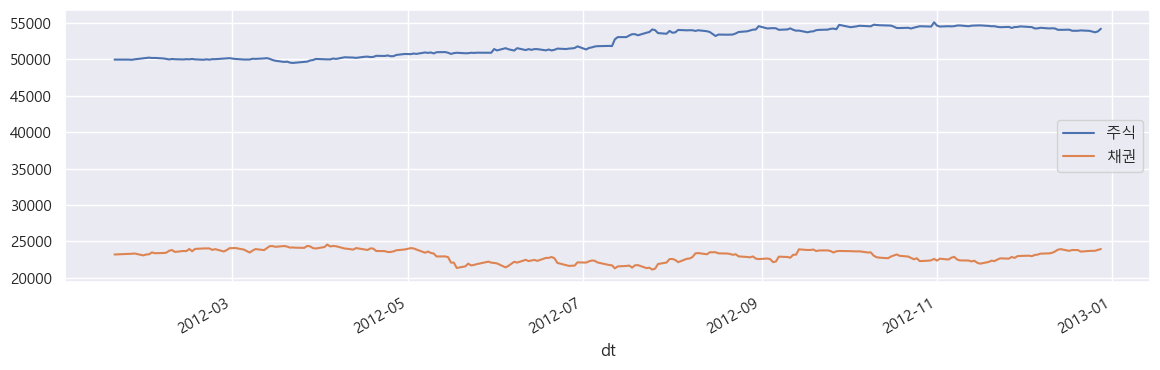

In [67]:
df.loc['2012'].plot(figsize=(14,4))
plt.show()

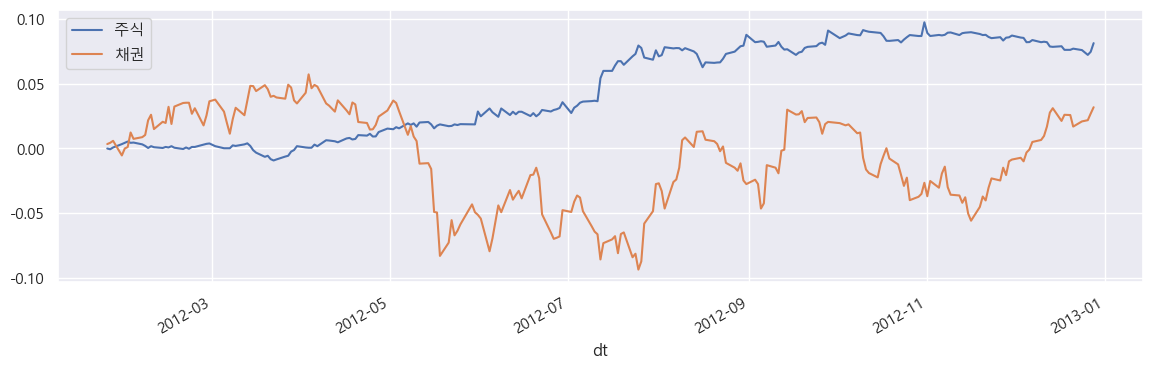

In [80]:
(np.log(1 + df.loc['2012'].pct_change())).cumsum().plot(figsize=(14,4))
plt.show()

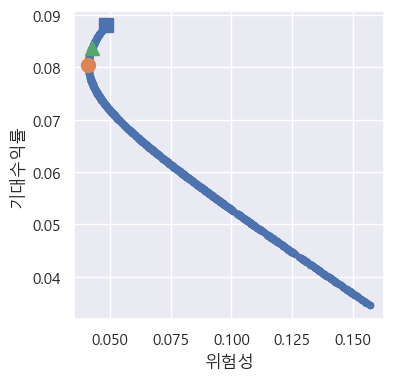

추천가중치 top3
           주식        채권
421  0.999339  0.000661
638  0.999093  0.000907
870  0.997523  0.002477


In [53]:
포트폴리오(ret_df.loc['2012'])

# 2013년

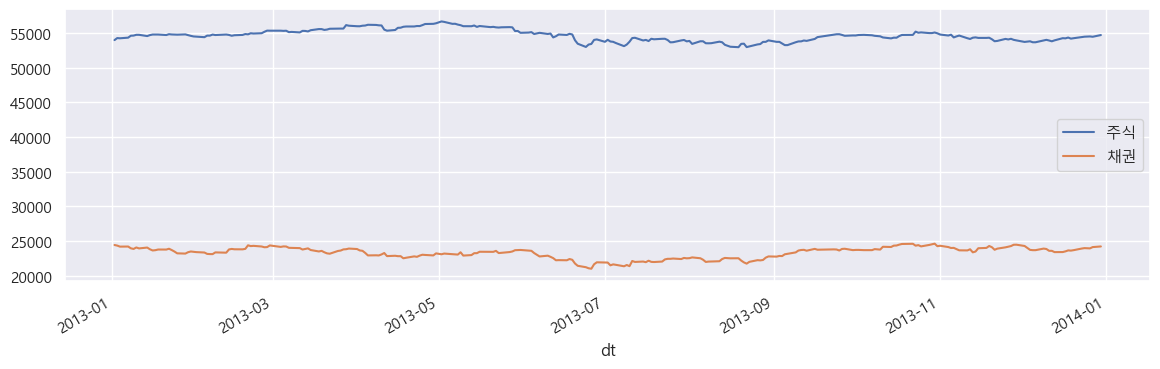

In [90]:
df.loc['2013'].plot(figsize=(14,4))
plt.show()

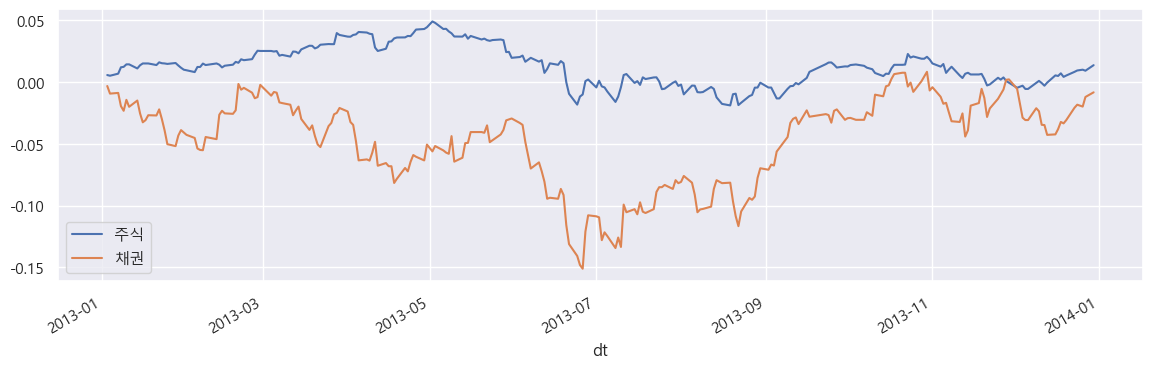

In [91]:
(np.log(1 + df.loc['2013'].pct_change())).cumsum().plot(figsize=(14,4))
plt.show()

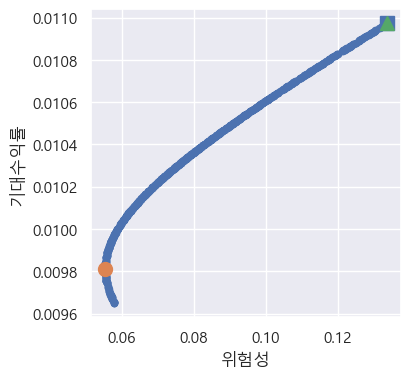

추천가중치 top3
           주식        채권
708  0.000455  0.999545
308  0.001054  0.998946
45   0.002323  0.997677


In [54]:
포트폴리오(ret_df.loc['2013'])

# 2014년

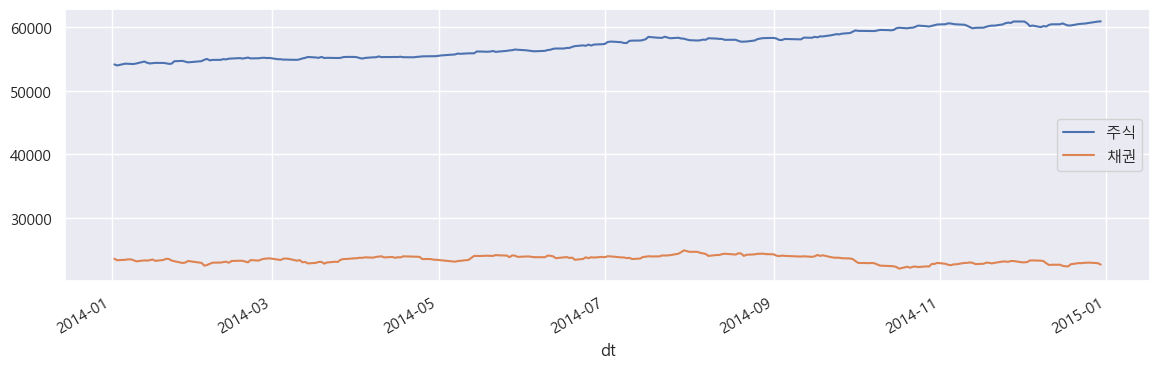

In [92]:
df.loc['2014'].plot(figsize=(14,4))
plt.show()

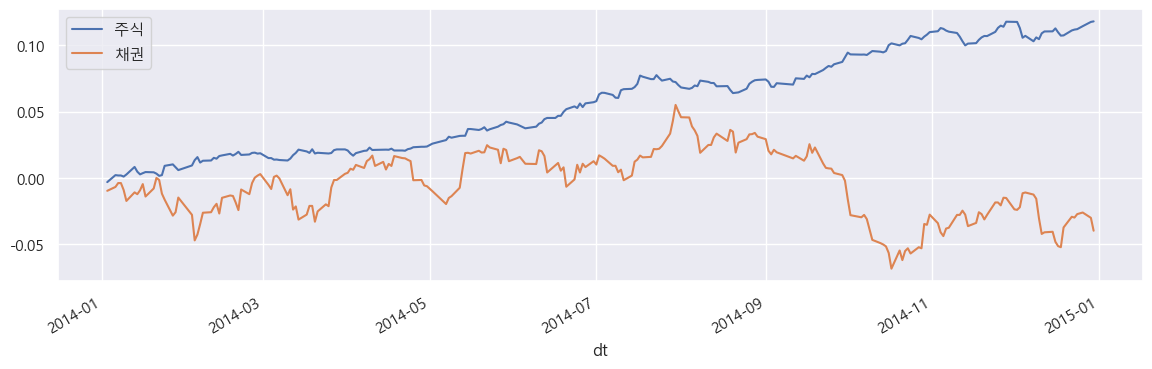

In [93]:
(np.log(1 + df.loc['2014'].pct_change())).cumsum().plot(figsize=(14,4))
plt.show()

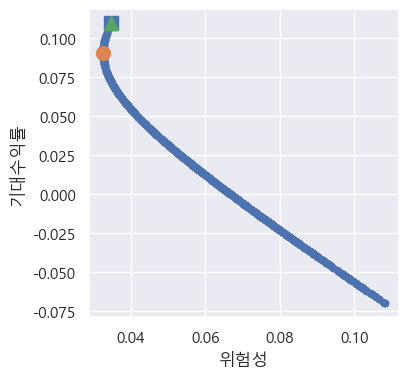

추천가중치 top3
           주식        채권
616  0.995807  0.004193
803  0.992656  0.007344
7    0.991277  0.008723


In [56]:
포트폴리오(ret_df.loc['2014'])

# 2015년

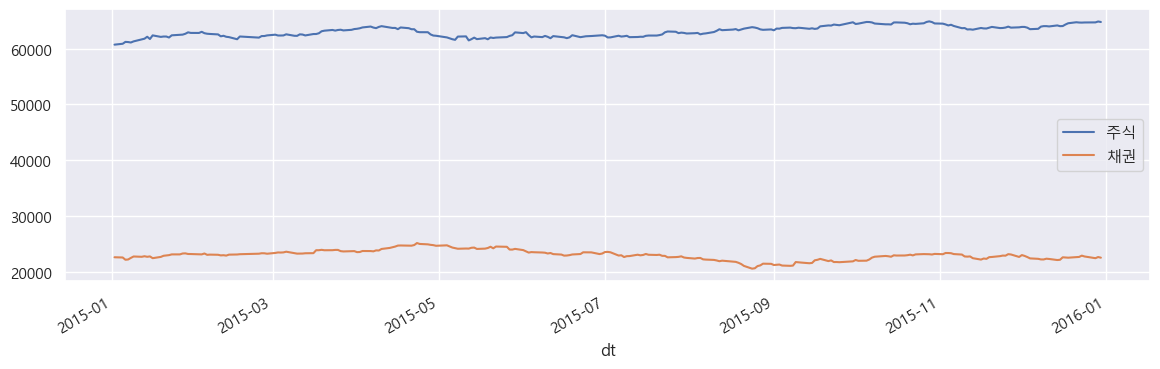

In [94]:
df.loc['2015'].plot(figsize=(14,4))
plt.show()

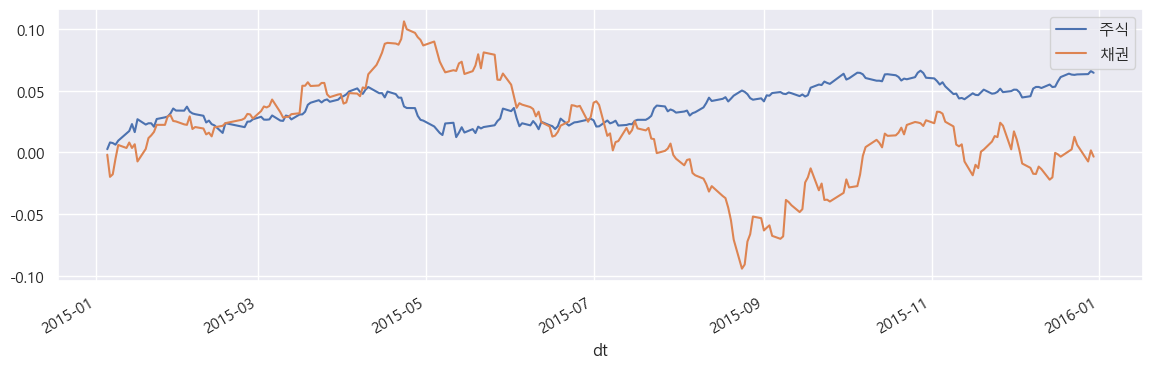

In [95]:
(np.log(1 + df.loc['2015'].pct_change())).cumsum().plot(figsize=(14,4))
plt.show()

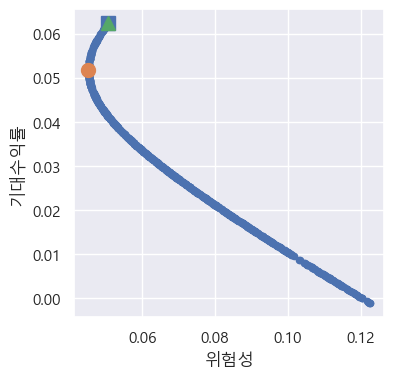

추천가중치 top3
           주식        채권
122  0.995689  0.004311
849  0.991504  0.008496
420  0.989293  0.010707


In [57]:
포트폴리오(ret_df.loc['2015'])

# 2016년

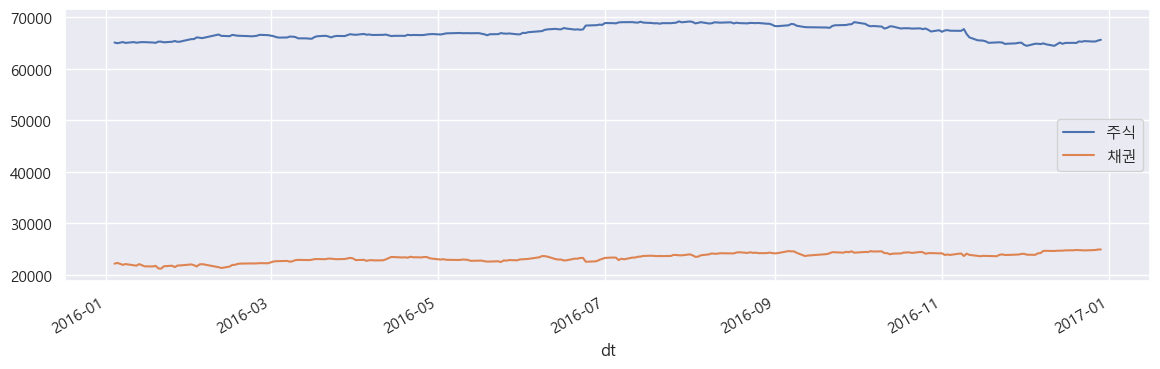

In [96]:
df.loc['2016'].plot(figsize=(14,4))
plt.show()

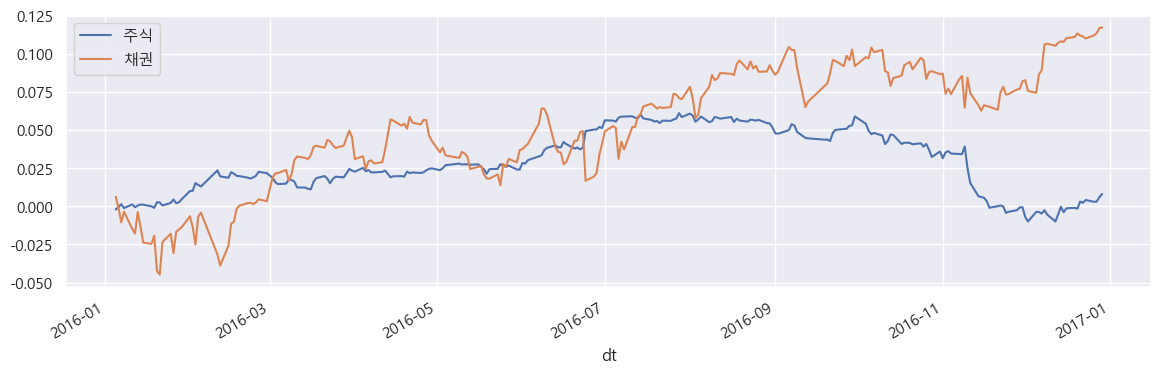

In [97]:
(np.log(1 + df.loc['2016'].pct_change())).cumsum().plot(figsize=(14,4))
plt.show()

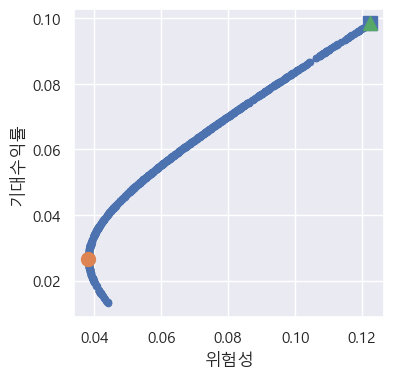

추천가중치 top3
           주식        채권
712  0.007537  0.992463
777  0.007805  0.992195
604  0.008464  0.991536


In [58]:
포트폴리오(ret_df.loc['2016'])

# 2017년

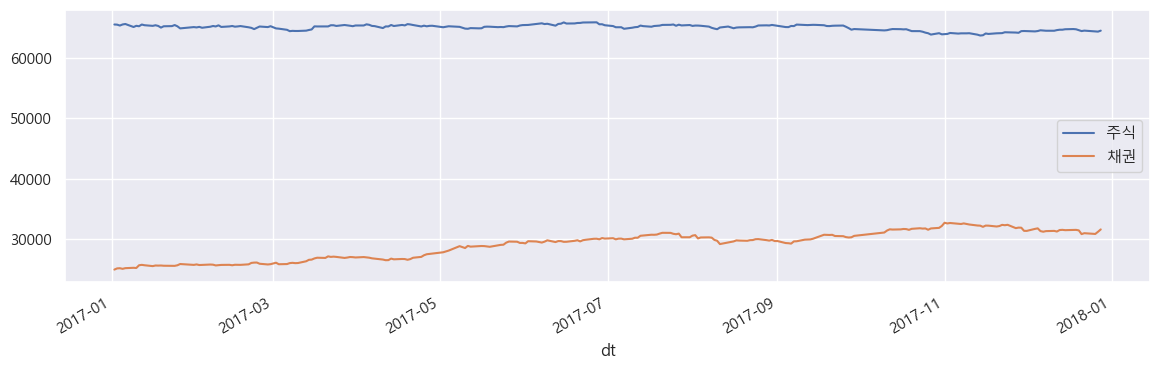

In [98]:
df.loc['2017'].plot(figsize=(14,4))
plt.show()

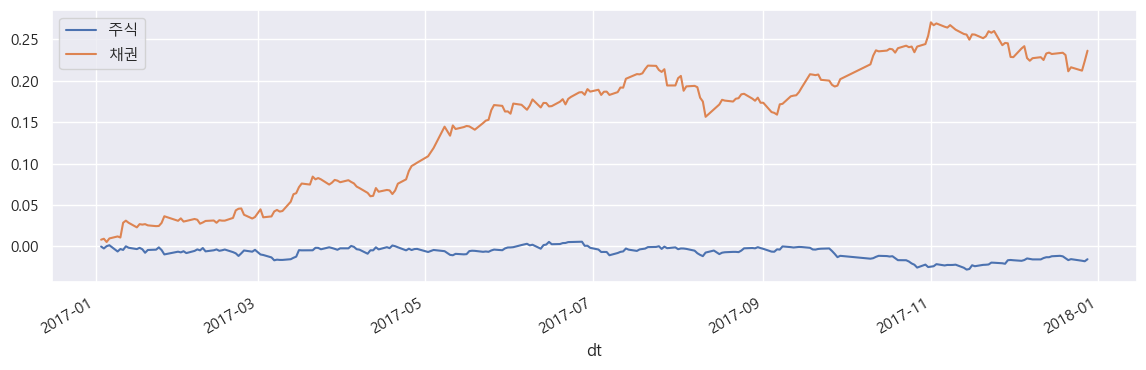

In [99]:
(np.log(1 + df.loc['2017'].pct_change())).cumsum().plot(figsize=(14,4))
plt.show()

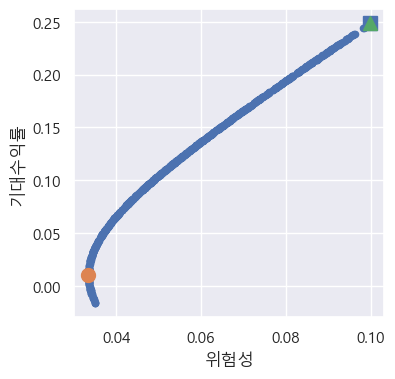

추천가중치 top3
           주식        채권
569  0.000012  0.999988
86   0.001807  0.998193
239  0.004080  0.995920


In [59]:
포트폴리오(ret_df.loc['2017'])

# 2018년

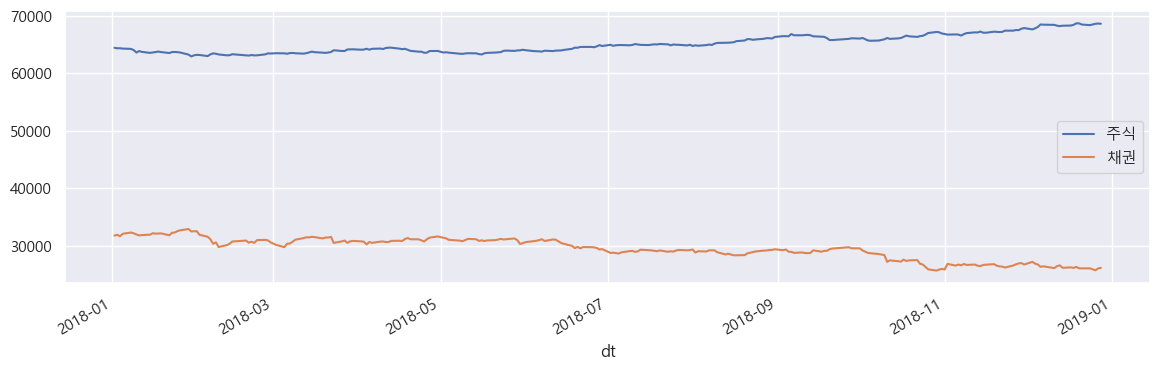

In [100]:
df.loc['2018'].plot(figsize=(14,4))
plt.show()

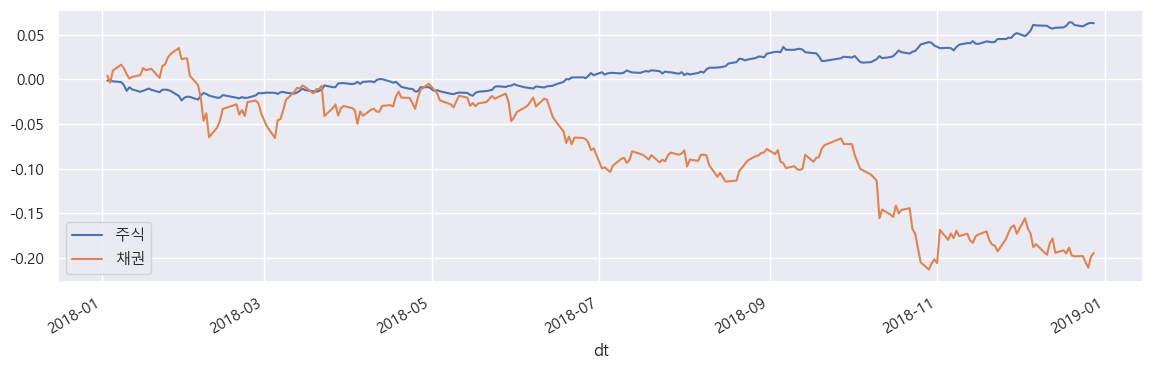

In [101]:
(np.log(1 + df.loc['2018'].pct_change())).cumsum().plot(figsize=(14,4))
plt.show()

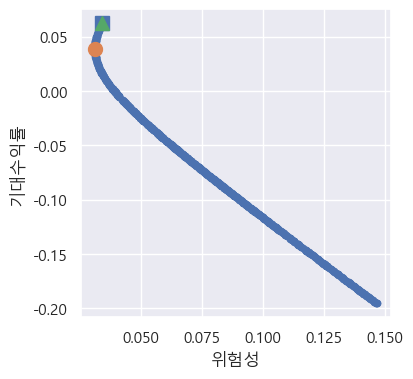

추천가중치 top3
           주식        채권
167  0.995578  0.004422
54   0.995426  0.004574
824  0.992169  0.007831


In [60]:
포트폴리오(ret_df.loc['2018'])

# 2019년

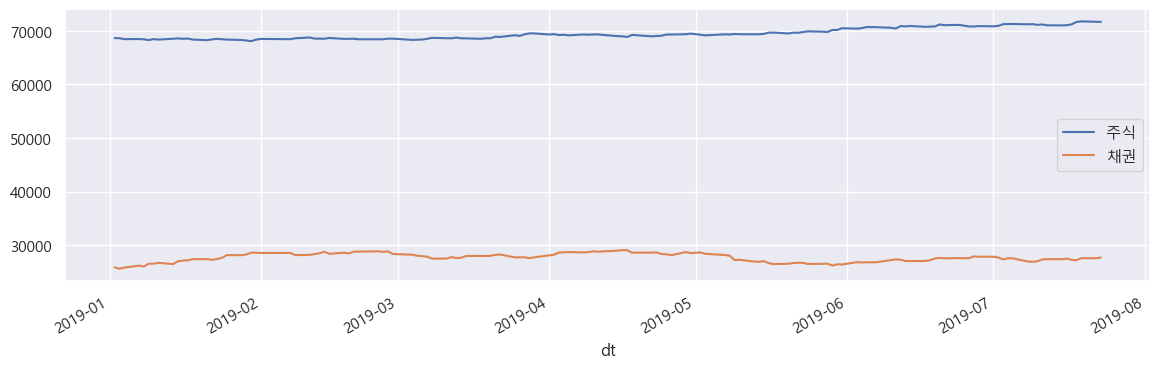

In [102]:
df.loc['2019'].plot(figsize=(14,4))
plt.show()

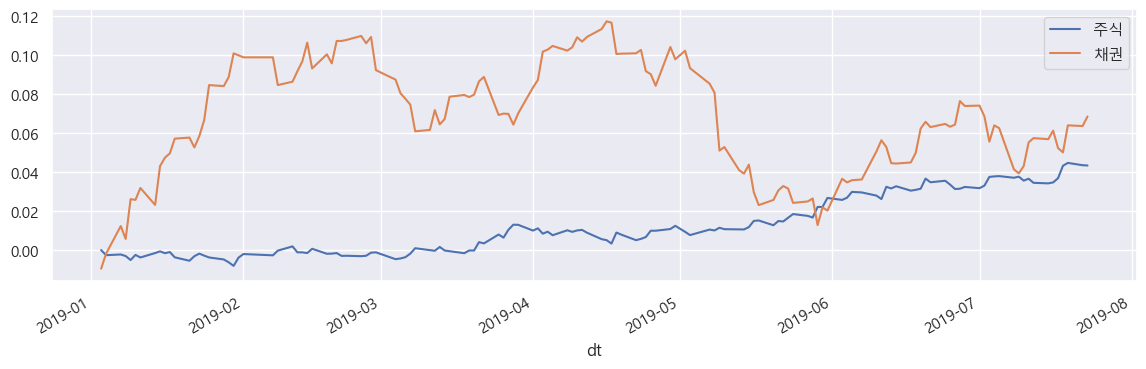

In [103]:
(np.log(1 + df.loc['2019'].pct_change())).cumsum().plot(figsize=(14,4))
plt.show()

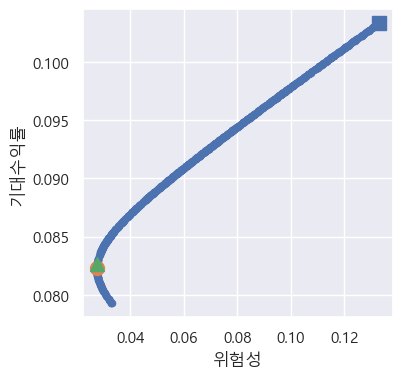

추천가중치 top3
           주식        채권
544  0.001085  0.998915
345  0.001980  0.998020
338  0.004734  0.995266


In [104]:
포트폴리오(ret_df.loc['2019'])